# Decesion Tree Regressor - Utkarsh Gaikwad

### Importing necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load California House Price Prediction Dataset

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing() 

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

### Fetch Dataset into dataframe

In [5]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.shape

(20640, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.sample(frac=0.25)

### Seperate dependent and independent variable

In [11]:
X = df.drop(labels=['Price'],axis=1)
Y = df[['Price']]

### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.33, random_state=42)

In [13]:
xtrain.shape

(3457, 8)

In [14]:
xtest.shape

(1703, 8)

### Create Decesion Tree Regressor Base Model

In [15]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor()

### Make Predictions on train and test

In [16]:
ypred_train = dtr.predict(xtrain)
ypred_test = dtr.predict(xtest)

In [17]:
ypred_train[0:5]

array([2.433, 1.597, 2.641, 0.813, 1.135])

In [18]:
ypred_test[0:5]

array([0.962  , 5.00001, 1.741  , 1.931  , 3.134  ])

### Evaluate model 

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(x,y,model):
    ypred = model.predict(x)
    mae = mean_absolute_error(y,ypred)
    mse = mean_squared_error(y,ypred)
    rmse = mse**0.5
    r2 = r2_score(y,ypred)
    return mae, mse, rmse, r2    

In [20]:
evaluate_model(xtrain,ytrain,dtr)

(4.3419772325519575e-17, 1.0565305152367037e-31, 3.2504315332532445e-16, 1.0)

In [21]:
evaluate_model(xtest, ytest, dtr)

(0.5338747621843806, 0.6561059644669407, 0.810003681761349, 0.5123594898720443)

In [22]:
def print_eval_results(xtrain,ytrain,xtest,ytest,model):
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(xtrain,ytrain,model)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(xtest,ytest,model)
    print(f'Train MAE  : {train_mae:.4f}')
    print(f'Train MSE  : {train_mse:.4f}')
    print(f'Train RMSE : {train_rmse:.4f}')
    print(f'Train R2   : {train_r2:.4f}')
    print('\n=======================================\n')
    print(f'Test MAE  : {test_mae:.4f}')
    print(f'Test MSE  : {test_mse:.4f}')
    print(f'Test RMSE : {test_rmse:.4f}')
    print(f'Test R2   : {test_r2:.4f}')

In [23]:
print_eval_results(xtrain,ytrain,xtest,ytest,dtr)

Train MAE  : 0.0000
Train MSE  : 0.0000
Train RMSE : 0.0000
Train R2   : 1.0000


Test MAE  : 0.5339
Test MSE  : 0.6561
Test RMSE : 0.8100
Test R2   : 0.5124


## Hyperparameter Tuning

In [24]:
parameters = {
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'max_depth':list(range(1,13)),
    'splitter':['best','random'],
    'max_features':['sqrt','log2']
}

In [29]:
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()
gscv = GridSearchCV(dtr, param_grid=parameters, cv=3, scoring='neg_mean_squared_error')

In [30]:
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [31]:
gscv.best_params_

{'criterion': 'poisson',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'best'}

In [32]:
gscv.best_score_

-0.5382184400891148

In [41]:
best_dtr = gscv.best_estimator_
best_dtr.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='poisson', max_depth=8, max_features='log2')

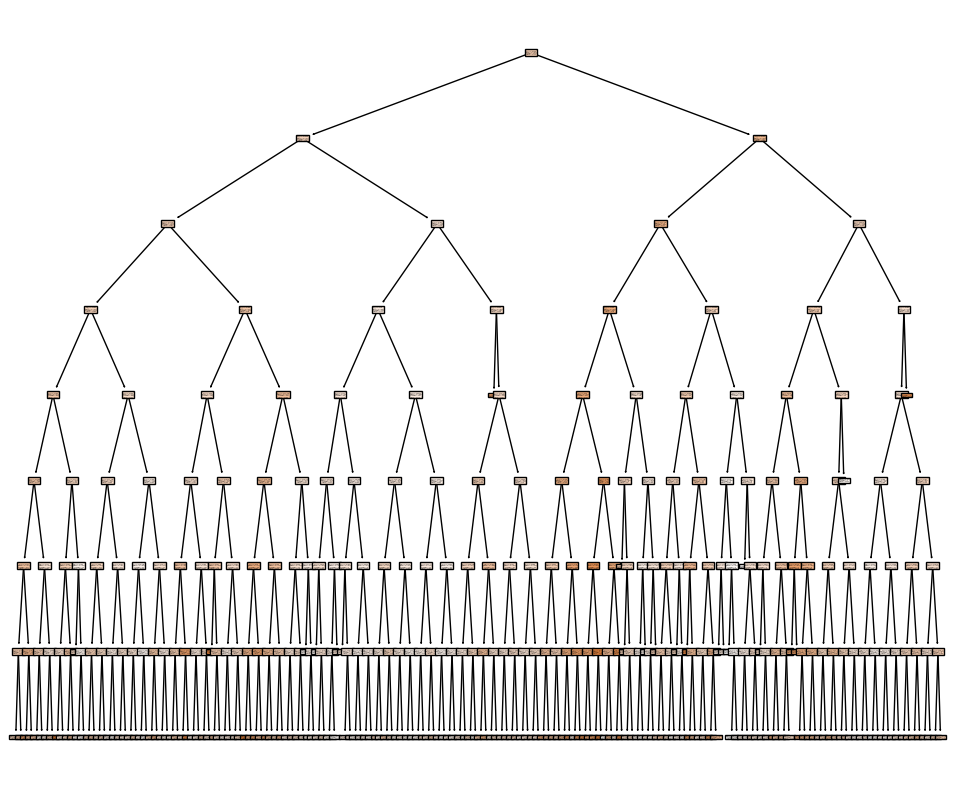

In [44]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(best_dtr, filled=True)
plt.show()

### Print Final Evaluations

In [42]:
print_eval_results(xtrain, ytrain, xtest, ytest, best_dtr)

Train MAE  : 0.4141
Train MSE  : 0.3619
Train RMSE : 0.6015
Train R2   : 0.7300


Test MAE  : 0.5208
Test MSE  : 0.5265
Test RMSE : 0.7256
Test R2   : 0.6087


### Saving Model Pickle file

In [36]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(best_dtr, file=f)

### Loading Pickle file for predictions

In [37]:
with open('model.pkl','rb') as f:
    model_dtr = pickle.load(f)

In [38]:
model_dtr

DecisionTreeRegressor(criterion='poisson', max_depth=8, max_features='log2')

In [39]:
ypred_train = model_dtr.predict(xtrain)
ypred_train[:5]

array([2.95054833, 1.26864151, 2.461625  , 0.68044444, 1.07622222])

In [40]:
ypred_test = model_dtr.predict(xtest)
ypred_test[:5]

array([2.95054833, 2.958875  , 1.77707594, 2.12217797, 2.12217797])